In [1]:
import pandas as pd 
import numpy
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
import platform, os, re, multiprocessing
import pandas as pd
import pyedflib
import mne
import matplotlib.pyplot as plt
import time  # Import the time module
import os 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from scipy import stats
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from scipy import stats
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
import mne
from mne.datasets import sample
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mne.decoding import (
    CSP,
    GeneralizingEstimator,
    LinearModel,
    Scaler,
    SlidingEstimator,
    Vectorizer,
    cross_val_multiscore,
    get_coef,
)
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r'/home/Duchuy220602/thesis/File_Feature_Pre/Scaled_File_total.csv')

In [3]:
X = df.iloc[:-1].drop(columns="Target")
y = df.iloc[:-1]["Target"]

smote = SMOTE(sampling_strategy = 'all',random_state=42)

sc = StandardScaler()

X = sc.fit_transform(X)

X, y = smote.fit_resample(X,y)

In [4]:
# Tạo một LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi y thành dạng số
y = label_encoder.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [6]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=60)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

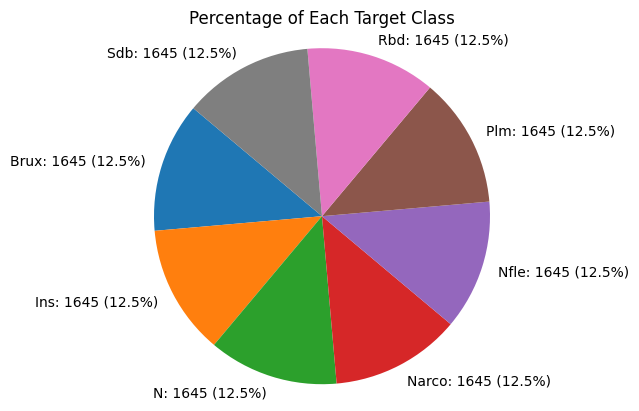

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is the given DataFrame
target_counts = df['Target'].value_counts()
total_rows = len(df)
target_percentages = target_counts / total_rows * 100

# Create labels with both percentage and count
labels = [f'{target_counts.index[i]}: {target_counts[i]} ({target_percentages[i]:.1f}%)' for i in range(len(target_counts))]

# Create a pie chart
plt.pie(target_percentages, labels=labels, autopct='', startangle=140)
plt.axis('equal')
plt.title('Percentage of Each Target Class')
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=13, weights='uniform', algorithm='auto', metric='euclidean')

# # Step 2: Define the pipeline with preprocessing and the KNN model
# pipeline = Pipeline([
#     ('scaler', sc),
#     ('knn', KNeighborsClassifier())
# ])

# # Step 3: Define hyperparameters to tune
# param_grid = {
#     'knn__n_neighbors': [5, 10, 15],  # Number of neighbors
#     'knn__weights': ['uniform', 'distance'],  # Weight function
#     'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm for nearest neighbors search
#     'knn__metric': ['euclidean', 'manhattan']  # Distance metric
# }

# # Step 4: Perform grid search with cross-validation
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_pca, y_train)

# # Step 5: Get the best model and evaluate it
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_pca)
# print(classification_report(y_test, y_pred))

In [9]:
model.fit(X_train_pca, y_train)

print(f"DONE")

DONE


In [10]:
y_hat = model.predict(X_test_pca)  # Use the model to make predictions

performance = pd.DataFrame({"Actual" : np.squeeze(y_test),
                            "Predicted" : y_hat})
performance.head(10)

Actual  Predicted
0       3          3
1       2          2
2       0          0
3       6          2
4       4          4
5       2          2
6       3          3
7       7          7
8       2          2
9       1          1

In [11]:
# calculate acc
acc_train = accuracy_score(y_train, model.predict(X_train_pca))
acc_val = accuracy_score(y_test, model.predict(X_test_pca))

print(f"acc_train = {acc_train:.2f}")
print(f"acc_val = {acc_val:.2f}")

acc_train = 0.87
acc_val = 0.83


In [12]:
# Make predictions on the test data
y_pred = model.predict(X_test_pca)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test.ravel(), y_pred)

print("Accuracy score: {:.2f}%".format(accuracy * 100))

Accuracy score: 83.21%


In [13]:
print(confusion_matrix(y_test, y_pred))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print("Unique labels in test set:", np.unique(y_test))

print("Unique predicted labels:", np.unique(y_pred))

[[539   0   1   2   0   0   0   1]
 [ 14 471   7  12  12  14   1  11]
 [  9  22 428  14   9  32   6  23]
 [ 18   2   8 458  17  18   5  17]
 [ 25  31  28  59 330  36   5  29]
 [  3  16   8  17  11 468   0  20]
 [  7  16   8  24  24  35 404  25]
 [  4   2   2   0   7  11   1 516]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       543
           1       0.84      0.87      0.85       542
           2       0.87      0.79      0.83       543
           3       0.78      0.84      0.81       543
           4       0.80      0.61      0.69       543
           5       0.76      0.86      0.81       543
           6       0.96      0.74      0.84       543
           7       0.80      0.95      0.87       543

    accuracy                           0.83      4343
   macro avg       0.84      0.83      0.83      4343
weighted avg       0.84      0.83      0.83      4343

Unique labels in test set: [0 1 2 3 4 5 6 7]
Unique predicted labels

In [14]:
import pickle
# Save Gradient Boosting model
with open('/home/Duchuy220602/thesis/Model_2/KNN_3.pkl', 'wb') as f:
    pickle.dump(model, f)

In [15]:
# import pickle
# from sklearn.ensemble import VotingClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import GradientBoostingClassifier

# # Load each individual model
# with open('/home/Duchuy220602/thesis/Model_2/SVM.pkl', 'rb') as file:
#     svm_model = pickle.load(file)

# with open('/home/Duchuy220602/thesis/Model_2/BaggingClassifier.pkl', 'rb') as file:
#     bagging_model = pickle.load(file)

# with open('/home/Duchuy220602/thesis/Model_2/gradient_boosting_model.pkl', 'rb') as file:
#     gradient_model = pickle.load(file)

# # Create a Voting Classifier with the individual models
# voting_model = VotingClassifier(
#     estimators=[
#         ('svm', svm_model),
#         ('bagging', bagging_model),
#         ('gradient', gradient_model)
#     ],
#     voting='hard'  # Use 'hard' for classification and 'soft' for probability averaging
# )

# # Save the ensemble model
# with open('/home/Duchuy220602/thesis/Model_2/ensemble_model.pkl', 'wb') as file:
#     pickle.dump(voting_model, file)